In [24]:
from IPython.display import SVG, display, Image
import cairo

DISP_WIDTH = 512
DISP_HEIGHT = 256
line_width = 0.002

# Display image in jupyter
def show_img(file):
    display(Image(filename=file))
    
def show_svg(file):
    display(SVG(filename=file))

# Decorator to display any cairo drawing. Saves result at tmp/example.svg and then shows.
def disp(*args, width = DISP_WIDTH, height = DISP_HEIGHT, **kwargs):
    def decorator_func(draw_func):
        with cairo.SVGSurface("tmp/tmp.svg", width, height) as surface:
            ctx = cairo.Context(surface)
            
            # border
            ctx.set_source_rgba(0, 0, 0, 1)
            ctx.rectangle(0, 0, width, height)
            ctx.set_line_width(2 * line_width * width)
            ctx.stroke()
            
            draw_func(ctx, *args, **kwargs)
        show_svg("tmp/tmp.svg")
    return decorator_func

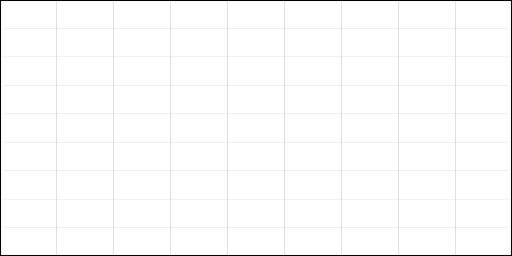

In [35]:
@disp()
def draw_grid(ctx):
    ctx.set_source_rgb(0, 0, 0)
    ctx.set_line_width(line_width)
    ctx.scale(DISP_WIDTH/9, DISP_HEIGHT/9)
    
    for x in range(10):
        ctx.move_to(x, 0)
        ctx.line_to(x, 9)
        ctx.stroke()
    for y in range(10):
        ctx.move_to(0, y)
        ctx.line_to(9, y)
        ctx.stroke()
        